In [1]:
import pandas as pd
import numpy as np

climate_df = pd.read_csv("climate_action_data.csv")
climate_df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [2]:
climate_df.isnull().sum()
climate_df[climate_df.apply(lambda row: row.astype(str).str.contains('error').any(), axis=1)]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
107,SEN-1107,2025-04-18,error,error,error,error,Tomatoes,error,error,IMG-2107
118,SEN-1118,2025-04-29,error,error,error,error,Beans,error,error,IMG-2118
244,SEN-1244,2025-09-02,error,error,error,error,Wheat,error,error,IMG-2244
459,SEN-1459,2026-04-05,error,error,error,error,Lettuce,error,error,IMG-2459
683,SEN-1683,2026-11-15,error,error,error,error,Maize,error,error,IMG-2683


In [3]:
climate_df = climate_df.replace('error', np.NaN)

In [4]:
climate_df

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
...,...,...,...,...,...,...,...,...,...,...
908,SEN-1090,2025-04-01,18.37,7.03,21.0,47.1,Maize,94.2,8.0,IMG-2090
909,SEN-1201,2025-07-21,15.89,6.4,30.5,33.3,Tomatoes,108.3,14.5,IMG-2201
910,SEN-1309,2025-11-06,28.96,5.04,20.5,47.6,Tomatoes,81.1,12.7,IMG-2309
911,SEN-1339,2025-12-06,16.85,6.57,19.3,34.5,Beans,48.5,12.7,IMG-2339


In [5]:
climate_df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [6]:
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)','Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in climate_df:
        climate_df[col] = pd.to_numeric(climate_df[col], errors='coerce')
        climate_df[col] = climate_df[col].fillna(climate_df[col].median())

In [7]:
climate_df

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
...,...,...,...,...,...,...,...,...,...,...
908,SEN-1090,2025-04-01,18.37,7.03,21.0,47.1,Maize,94.2,8.0,IMG-2090
909,SEN-1201,2025-07-21,15.89,6.40,30.5,33.3,Tomatoes,108.3,14.5,IMG-2201
910,SEN-1309,2025-11-06,28.96,5.04,20.5,47.6,Tomatoes,81.1,12.7,IMG-2309
911,SEN-1339,2025-12-06,16.85,6.57,19.3,34.5,Beans,48.5,12.7,IMG-2339


In [8]:
climate_df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [ ]:
#filling in the empty cells for Crop_Type using Mode
non_numeric = ['Crop_Type'] 
for x in non_numeric:     
    if x in climate_df:         
        climate_df[x] = climate_df[x].fillna(climate_df[x].mode()[0]) 

In [ ]:
#check whethr the Crop Type is now worked on well
climate_df

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
...,...,...,...,...,...,...,...,...,...,...
908,SEN-1090,2025-04-01,18.37,7.03,21.0,47.1,Maize,94.2,8.0,IMG-2090
909,SEN-1201,2025-07-21,15.89,6.40,30.5,33.3,Tomatoes,108.3,14.5,IMG-2201
910,SEN-1309,2025-11-06,28.96,5.04,20.5,47.6,Tomatoes,81.1,12.7,IMG-2309
911,SEN-1339,2025-12-06,16.85,6.57,19.3,34.5,Beans,48.5,12.7,IMG-2339


In [ ]:
#we are droping empty cells for the date
climate_df = climate_df.dropna()

In [ ]:
#we nolonger have null values in our dataset
climate_df.isnull().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [14]:
#check for duplicates in our dataset
print("No. of duplicates:" ,climate_df.duplicated().sum())

No. of duplicates: 111


In [15]:
#lets now remove the duplicated:
climate_df = climate_df.drop_duplicates()

Text(0.5, 1.0, 'HISTOGRAM FOR SOIL PH')

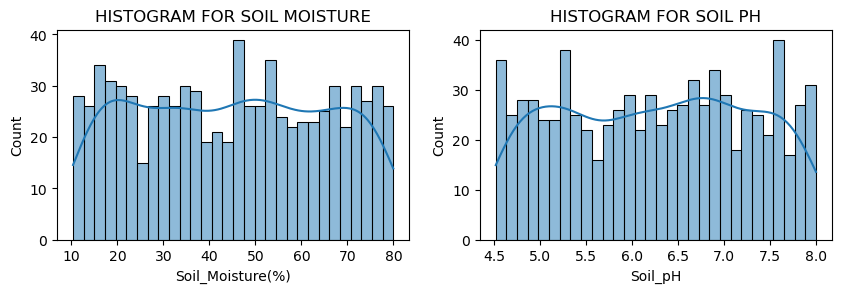

In [16]:
#histogram 

import matplotlib.pyplot as ply
import seaborn as sb

ply.figure(figsize=(10, 6))
ply.subplot(2,2,1)
sb.histplot(
    climate_df['Soil_Moisture(%)'],
    bins = 30,
    kde= True
)
ply.title("HISTOGRAM FOR SOIL MOISTURE")

# Histogram for soil php
ply.subplot(2,2,2)
sb.histplot(
    climate_df['Soil_pH'],
    bins = 30,
    kde= True
)
ply.title("HISTOGRAM FOR SOIL PH")

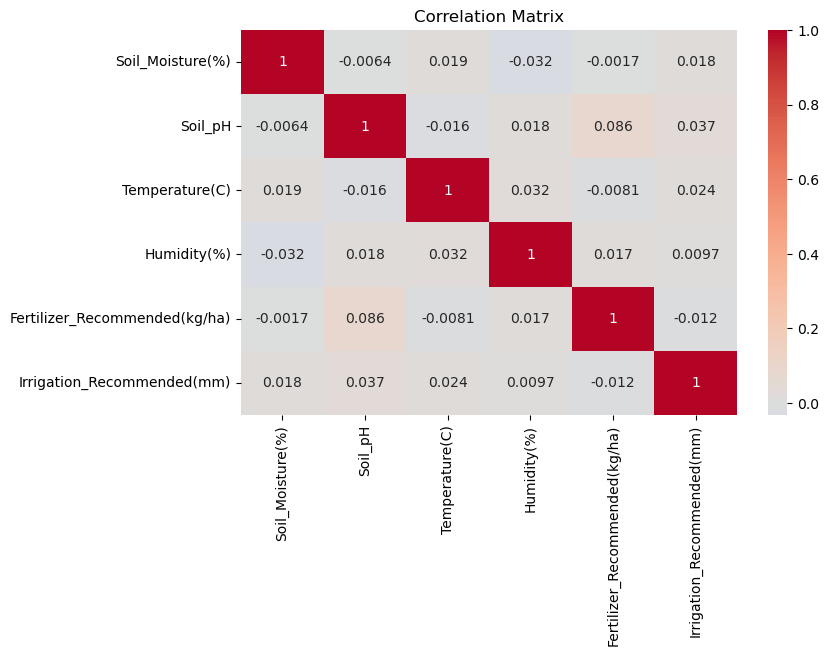

In [17]:
# Calculate correlations
corr_matrix = climate_df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)','Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

# Plot correlation heatmap
ply.figure(figsize=(8, 5))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
ply.title('Correlation Matrix')
ply.show()

In [18]:
# Group by crop type and calculate mean soil moisture
avg_moisture_by_crop = climate_df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()

# Find the crop type with highest average soil moisture
highest_avg_crop = avg_moisture_by_crop.idxmax()
highest_avg_value = avg_moisture_by_crop.max()

print(f"Crop type with highest average soil moisture: {highest_avg_crop}")
print(f"Average soil moisture value: {highest_avg_value:.2f}")

Crop type with highest average soil moisture: Wheat
Average soil moisture value: 47.36


In [19]:
climate_df.to_csv("cleaned_precision_agriculture_data.csv", index=True)